credit: https://www.kaggle.com/code/romaupgini/guide-external-data-features-for-multivariatets/notebook


### Notes:
1. MultiVariate TS Pred,
2. Re-read logic on how eg. with bottom 60% of low sales products in the separate list.
3. 1782 Columns, after Zero Forecasting, 1658 
4. Zero Forecasting : In [12]
5. FeaturesEnricher: Adds new feature : In [26]
6. CustomRegressor : creates 1658 independent models
7. TransformedTargetRegressor


# 🔎 How to find relevant external features & data for kaggle competitions in 10 minutes [3/3]
### Part #3 -  Improve accuracy of Multivariate Time Series kernel from external features & data
##### [Part #1 Link](https://www.kaggle.com/code/romaupgini/how-to-find-external-data-for-1-private-lb-4-50)
##### [Part #2 Link](https://www.kaggle.com/code/romaupgini/zero-feature-engineering-with-upgini-pycaret)
______________________________
*updated 2022-06-06 [@roma-upgini](https://www.kaggle.com/romaupgini)*

**❓Before reading the notebook, what will you learn from it?**

1. How external data & features might help on Kaggle: two scenarios
2. How to find relevant external features in less than 10 minutes and save time on feature engineering 
3. How to calculate metrics and uplifts from new external features
4. What external data sources might help you on Kaggle competitions

Extra **tips & tricks**:  

5. How and when to do **zero forecasting**
6. How to do **target log(y)+1 transform** for better model fit, as part of a scikit-learn model 
7. How to do **rounding to the nearest integer** for better prediction accuracy, as part of a scikit-learn model
8. How quickly analyse dependences between components of Multivariate Time Series
9. How to check TS on stationarity 
10. How generate hypotesis on model type for specific time series component in Multivariate TS

🗣 Share this notebook: [Shareable Link](https://www.kaggle.com/code/romaupgini/external-data-features-for-multivariate-ts)
______________________________
### Table of contents
* [Intro](#Intro)

* [How external data & features might help on Kaggle?](#How-external-data-&-features-might-help-on-Kaggle?)

* [1️⃣ Make/fork a baseline notebook for feature enrichment](#1️⃣-Make/fork-a-baseline-notebook-for-feature-enrichment)

* [2️⃣ Quick analysis of Multivariate Time Series data](#2️⃣-Quick-analysis-of-Multivariate-Time-Series-data)

* [3️⃣ Find relevant external features for several TS components in Multivariate Time Series](#3️⃣-Find-relevant-external-features-for-several-TS-components-in-Multivariate-Time-Series)

* [4️⃣ Train final model](#4️⃣-Train-final-model)

* [5️⃣ Submit prediction with enriched features and calculate final leaderbord progress](#5️⃣-Submit-prediction-with-enriched-features-and-calculate-final-leaderbord-progress)
    
* [Relevant external features & data sources](#🌎-Relevant-external-features-&-data-sources)   

## Intro
**Competition**: [Store Sales - Time Series Forecasting](https://www.kaggle.com/competitions/store-sales-time-series-forecasting), [RMSLE as a target metric](https://www.kaggle.com/code/carlmcbrideellis/store-sales-using-the-average-of-the-last-16-days#Note-regarding-calculating-the-average)  
**Special thanks**:
* EDA with a lot of small but important details: [Store Sales TS Forecasting - A Comprehensive Guide](https://www.kaggle.com/ekrembayar/store-sales-ts-forecasting-a-comprehensive-guide) by [Ekrem Bayar](https://www.kaggle.com/ekrembayar)  
* Inital regressor architecture: [Simple TS + Ridge + RF](https://www.kaggle.com/dkomyagin/simple-ts-ridge-rf) by [KDJ2020](https://www.kaggle.com/dkomyagin)  
* Further tuning of regressor with voting ensemble: [Notebook](https://www.kaggle.com/hiro5299834/store-sales-ridge-voting-bagging-et-bagging-rf) by [BIZEN's](https://www.kaggle.com/hiro5299834)  
* Greate note on [asymmetrical nature of RMSLE](https://www.kaggle.com/code/carlmcbrideellis/store-sales-using-the-average-of-the-last-16-days#Note-regarding-calculating-the-average) by [Carl McBride Ellis](https://www.kaggle.com/carlmcbrideellis)

📚 In this notebook we'll use:
* [Upgini](https://github.com/upgini/upgini#readme) - Low-code Feature search and enrichment library for supervised machine learning applications.   
<a href="https://github.com/upgini/upgini">
    <img src="https://img.shields.io/badge/GitHub-100000?style=for-the-badge&logo=github&logoColor=white"  align='center'>
</a>  

## How external data & features might help on Kaggle?
Kaggle is always about learning and leader board progress (hopefully from learning, not cheating ;-))  
And every Kaggler wants to progress as fast as possible, so time saving tips & tricks is a big deal as well.  
That's why low-code tools is adopted among kagglers.

So, there are **two major scenarios** of external features & data introduction in competitions on Kaggle:

1. **Final improvement of a polished kernel**  
In this scenario you want **to improve already polished kernel** (optimized features, model architecture and hyperparams) with new external features.  
Before that, most of the juice already has been "squeezed" from competition data by significant efforts in feature engineering.  
And you want to answer the simple question - *Is there any external data sources and features which might boost accuracy a bit more?*  
However, there is a caveat to this approach: current model architecture & hyperparameters might be suboptimal for the new feature set, after introduction even single new var.  
So, extra step back for model tuning might be needed.

2. **Low-code initial feature engineering - add relevant external features @start**  
Here you want to **save time on feature search and engineering**. If there are some ready-to-use external features and data, let's use it to speed up the overall progress.  
In this scenario always make sense to check that new external features have optimal representation for specific task and target model architecture. Example - category features for linear regression models should be one-hot-encoded.
This type of feature preparation should be done manually in any case.  
Same as scenario #1, there is a caveat to this approach: a lot of features not always a good thing - they might lead to dimensionality increase and model overfitting.  
You have to check model accuracy improvement metrics after enrichment with the new features and ALWAYS with appropriate cross-validation strategy.
 
In this Guide we'll go with **Scenario #1**. Also you can check out Part #2 Guide for the [**Scenario #2**](https://www.kaggle.com/code/romaupgini/zero-feature-engineering-with-upgini-pycaret), and another example for Scenario #1 - [Part 1](https://www.kaggle.com/code/romaupgini/how-to-find-external-data-for-1-private-lb-4-50)

## 1️⃣ Make/fork a baseline notebook for feature enrichment

In this tutorial we forked [Hyperparamaters](https://www.kaggle.com/code/rizkykiky/hyperparamaters) public notebook by [Rizky Anugrah Ananto](https://www.kaggle.com/rizkykiky) (thank you!), which has a public LB score **0.40419**  
And made some changes:

* Added time dependent features based on salary schedule in the Ecuador public sector;
* Added Zero forecasting for zero-sales product families in specific stores;
* Updated blending approach to "Same store sales predicitions as new features" and made a quick explanation why this works;
* Added Power transformation (Yeo-Johnson) for X and Log(y)+1 transformation for y in regressors;
* Added different regressor types (Trees, KNN, Bayesian) for different product groups timeseries.

[⬇️ Step 2](#2️⃣-Quick-analysis-of-Multivariate-Time-Series-data)

___________________________________________________________
### Packages and functions

In [3]:
%pip install -Uq upgini
import numpy as np
import pandas as pd
import statsmodels

import statsmodels.api as sm
from statsmodels.tsa.deterministic import DeterministicProcess, CalendarFourier
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
# visualization tools
from matplotlib import pyplot as plt, style
style.use('seaborn-darkgrid')
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as px
from tqdm import tqdm

import gc
gc.enable()
from warnings import filterwarnings, simplefilter
filterwarnings('ignore')
simplefilter('ignore')

Note: you may need to restart the kernel to use updated packages.


In [4]:
print(statsmodels.__version__)

0.13.2


### Reading train and test datasets

In [2]:
train = pd.read_csv('../input/store-sales-time-series-forecasting/train.csv',
                    parse_dates = ['date'], infer_datetime_format = True,
                    dtype = {'store_nbr' : 'category',
                             'family' : 'category'},
                    usecols = ['date', 'store_nbr', 'family', 'sales'])
train['date'] = train.date.dt.to_period('D')
train = train.set_index(['date', 'store_nbr', 'family']).sort_index()
print(train.shape)
train.head()

(3000888, 1)


sales
date       store_nbr family           
2013-01-01 1         AUTOMOTIVE    0.0
                     BABY CARE     0.0
                     BEAUTY        0.0
                     BEVERAGES     0.0
                     BOOKS         0.0

In [3]:
test = pd.read_csv('../input/store-sales-time-series-forecasting/test.csv',
                   parse_dates = ['date'], infer_datetime_format = True)
test['date'] = test.date.dt.to_period('D')
test = test.set_index(['date', 'store_nbr', 'family']).sort_values('id')
print(test.shape)
test.head()

(28512, 2)


id  onpromotion
date       store_nbr family                          
2017-08-16 1         AUTOMOTIVE  3000888            0
                     BABY CARE   3000889            0
                     BEAUTY      3000890            2
                     BEVERAGES   3000891           20
                     BOOKS       3000892            0

### Oil price lag features

In [4]:
calendar = pd.DataFrame(index = pd.date_range('2013-01-01', '2017-08-31')).to_period('D')
oil = pd.read_csv('../input/store-sales-time-series-forecasting/oil.csv',
                  parse_dates = ['date'], infer_datetime_format = True,
                  index_col = 'date').to_period('D')
oil['avg_oil'] = oil['dcoilwtico'].rolling(7).mean()
calendar = calendar.join(oil.avg_oil)
calendar['avg_oil'].fillna(method = 'ffill', inplace = True)
calendar.dropna(inplace = True)

We concatenated calendar with oil price and replaced NaN with **last valid** observation price.   
Now, let's calculate *partial autocorrelation* to select proper lags for oil price features.  
The lag feature - shifting a time series forward one step or more.

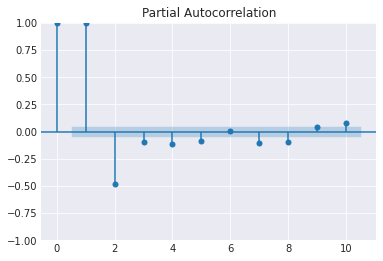

In [5]:
_ = plot_pacf(calendar.avg_oil, lags = 10)

Oil price lags for the first 3 days should be enough:

In [6]:
n_lags = 3
for l in range(1, n_lags + 1):
    calendar[f'oil_lags{l}'] = calendar.avg_oil.shift(l)
calendar.dropna(inplace = True)

### Holiday features

In [7]:
hol = pd.read_csv('../input/store-sales-time-series-forecasting/holidays_events.csv',
                  parse_dates = ['date'], infer_datetime_format = True,
                  index_col = 'date').to_period('D')
hol = hol[hol.locale == 'National']  # Only National holidays so there'll be no false positive.
hol = hol.groupby(hol.index).first() # Remove duplicated holidays
print(hol.shape)
hol.head()

(168, 5)


,type,locale,locale_name,description,transferred
date,,,,,
2012-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,False
2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
2012-11-02,Holiday,National,Ecuador,Dia de Difuntos,False
2012-11-03,Holiday,National,Ecuador,Independencia de Cuenca,False


In [8]:
calendar = calendar.join(hol)               # Joining calendar with holiday dataset
calendar['dofw'] = calendar.index.dayofweek # Day of week
calendar['wd'] = 1
calendar.loc[calendar.dofw > 4, 'wd'] = 0   # If it's saturday or sunday then it's not Weekday
calendar.loc[calendar.type == 'Work Day', 'wd'] = 1 # If it's Work Day event then it's a workday
calendar.loc[calendar.type == 'Transfer', 'wd'] = 0 # If it's Transfer event then it's not a work day
calendar.loc[calendar.type == 'Bridge', 'wd'] = 0 # If it's Bridge event then it's not a work day
calendar.loc[(calendar.type == 'Holiday') & (calendar.transferred == False), 'wd'] = 0 # If it's holiday and the holiday is not transferred then it's non working day
calendar.loc[(calendar.type == 'Holiday') & (calendar.transferred == True), 'wd'] = 1 # If it's holiday and transferred then it's working day
calendar = pd.get_dummies(calendar, columns = ['dofw'], drop_first = True) # One-hot encoding (Make sure to drop one of the columns by 'drop_first = True')
calendar = pd.get_dummies(calendar, columns = ['type']) # One-hot encoding for type holiday (No need to drop one of the columns because there's a "No holiday" already)
calendar.drop(['locale', 'locale_name', 'description', 'transferred'], axis = 1, inplace = True) # Unused columns
print(calendar.shape)
calendar.head()

(1692, 17)


,avg_oil,oil_lags1,oil_lags2,oil_lags3,wd,dofw_1,dofw_2,dofw_3,dofw_4,dofw_5,dofw_6,type_Additional,type_Bridge,type_Event,type_Holiday,type_Transfer,type_Work Day
2013-01-13,93.284286,93.284286,93.284286,93.218571,0,0,0,0,0,0,1,0,0,0,0,0,0
2013-01-14,93.470000,93.284286,93.284286,93.284286,1,0,0,0,0,0,0,0,0,0,0,0,0
2013-01-15,93.490000,93.470000,93.284286,93.284286,1,1,0,0,0,0,0,0,0,0,0,0,0
2013-01-16,93.644286,93.490000,93.470000,93.284286,1,0,1,0,0,0,0,0,0,0,0,0,0
2013-01-17,93.970000,93.644286,93.490000,93.470000,1,0,0,1,0,0,0,0,0,0,0,0,0


### Time dependent features
Wages in the public sector are paid every two weeks on the 15th and on the last day of the month

In [9]:
calendar['wageday']=0
calendar.loc[(calendar.index.to_timestamp().is_month_end) | (calendar.index.day == 15), 'wageday'] = 1

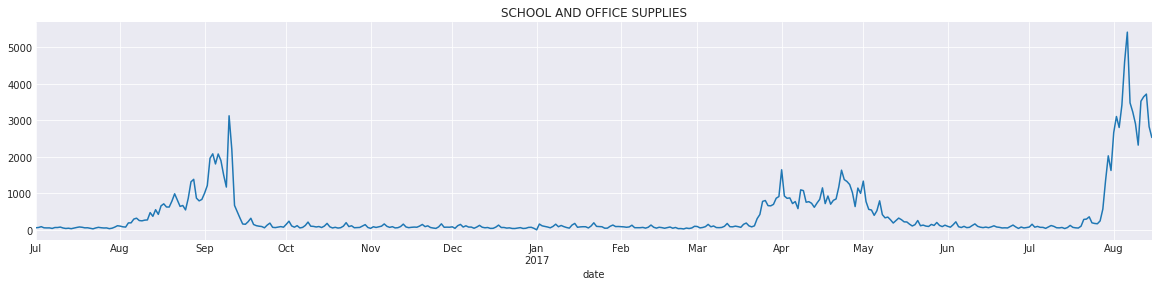

In [10]:
ax = plt.subplots(1,1,figsize = (20,4))
train.loc["2016-07-01":].filter(like = 'SCHOOL AND OFFICE SUPPLIES', axis=0).groupby(["date"]).sales.sum().plot(title = "SCHOOL AND OFFICE SUPPLIES")
plt.show()

School seasons - April and May, than August and September. Let's put this information into the flag:

In [11]:
school_season = []
for i, r in calendar.iterrows():
    if i.month in [4, 5, 8, 9] :
        school_season.append(1)
    else :
        school_season.append(0)
calendar['school_season'] = school_season

### Zero forecasting
Some stores do not sell specific products at all OR probably stop selling products after some time (assortiment enhancement trials?). Which looks like the case for HOME APPLIANCES in certain stores.   
So let's make it as a hard coded prediction with following logic: **15 days of zero sales** from 2017-08-01 till 2017-08-15 will lead to zero forecast. Except SCHOOL AND OFFICE SUPPLIES products, which has very specific seasonality pattern.
Code credits to [@Ekrem Bayar](https://www.kaggle.com/ekrembayar/store-sales-ts-forecasting-a-comprehensive-guide#5.-Sales)
> **Note**: Zero forecasting is one of the approaches to reduce compute & memory consumption. That definitley will be usefull for this notebook, keeping in mind amount of computations in CustomRegressor.

In [12]:
c = train.groupby(["store_nbr","family"]).tail(15).groupby(["store_nbr","family"]).sales.sum().reset_index()
c = c[c.sales == 0].drop("sales",axis = 1)
c = c[c.family != "SCHOOL AND OFFICE SUPPLIES"]
c.shape

(124, 2)

In [13]:
print("Shape of train before zero forecasting:", train.shape)
outer_join = train.reset_index().merge(c, how = 'outer', indicator = True)
train = outer_join[~(outer_join._merge == 'both')].drop('_merge', axis = 1)
train = train.set_index(['date', 'store_nbr', 'family']).sort_index()
del outer_join
gc.collect()
print("Shape of train after zero forecasting:", train.shape)

Shape of train before zero forecasting: (3000888, 1)
Shape of train after zero forecasting: (2792072, 1)


As you can see - now we removed zero sales from train data, so lets' save it into separate dataframe. And then append to test set on submission phase

In [14]:
zero_prediction = []
for i in range(0, len(c)):
    zero_prediction.append(
        pd.DataFrame({
            "date":pd.date_range("2017-08-16", "2017-08-31").tolist(),
            "store_nbr":c.store_nbr.iloc[i],
            "family":c.family.iloc[i],
            "sales":0
        })
    )
zero_prediction = pd.concat(zero_prediction)
zero_prediction['date'] = zero_prediction.date.dt.to_period('D')
del c
gc.collect()
zero_prediction = zero_prediction.set_index(['date', 'store_nbr', 'family'])
zero_prediction.head()

,,,sales
date,store_nbr,family,
2017-08-16,1,BABY CARE,0
2017-08-17,1,BABY CARE,0
2017-08-18,1,BABY CARE,0
2017-08-19,1,BABY CARE,0
2017-08-20,1,BABY CARE,0


### Week seasonality features

It's important to select training period correctly. Let's check stores opening, as we want a period where ALL data for all stores are available, so there is **no zero sales values as store hasn't been opened yet**

In [15]:
a = train.groupby(["date","store_nbr"]).sum().reset_index()
a = a[a["sales"] > 0].groupby("store_nbr")[["date"]].min().sort_values(by="date",ascending = False).head(5)
a.rename(columns = {'date':'open_date'}, inplace = True)
a

,open_date
store_nbr,
52,2017-04-20
22,2015-10-09
42,2015-08-21
21,2015-07-24
29,2015-03-20


Store #52 was the latest opened store (**open date is 2017-04-20**),
so let's take next date as start - **2017-04-21**: 

In [16]:
y = train.unstack(['store_nbr', 'family']).loc["2017-04-21":]
fourier = CalendarFourier(freq = 'W', order = 3)
dp = DeterministicProcess(index = y.index,
                          order = 1,
                          seasonal = False,
                          constant = False,
                          additional_terms = [fourier],
                          drop = True)
x = dp.in_sample()
x = x.join(calendar)
x.index.name = "date"

# Test will have a prediction for the next 16 days from 15.08 till 31.08
xtest = dp.out_of_sample(steps = 16) 
xtest = xtest.join(calendar)
xtest.index.name = "date"

del hol
del calendar
del dp
del oil
_ = gc.collect()

_____________________________________
## 2️⃣ Quick analysis of Multivariate Time Series data

First, what is a multivariate time series?  
"A Multivariate Time Series consist of more than one time-dependent variable and each variable depends not only on its past values but also has **some dependency on other variables**."  
What we have in this playground competition is a Multivariate TS - each combination of FAMILY x STORE is a *SEPARATE* Time Series. And we have 33 x 54 = 1782 TS values (**y** to predict). If we take into account our zero forecasting trick, we get 1658 different TS, which is a little better.

So let's build a correlation matrix between time-dependent variables (product families here), as it's a very well known fact, that for the FMCG goods there is a strong correlation between product categories - when buying product X, consumer buys product Y as well:

[⬇️ Step 3](#3️⃣-Find-relevant-external-features-for-several-TS-components-in-Multivariate-Time-Series)


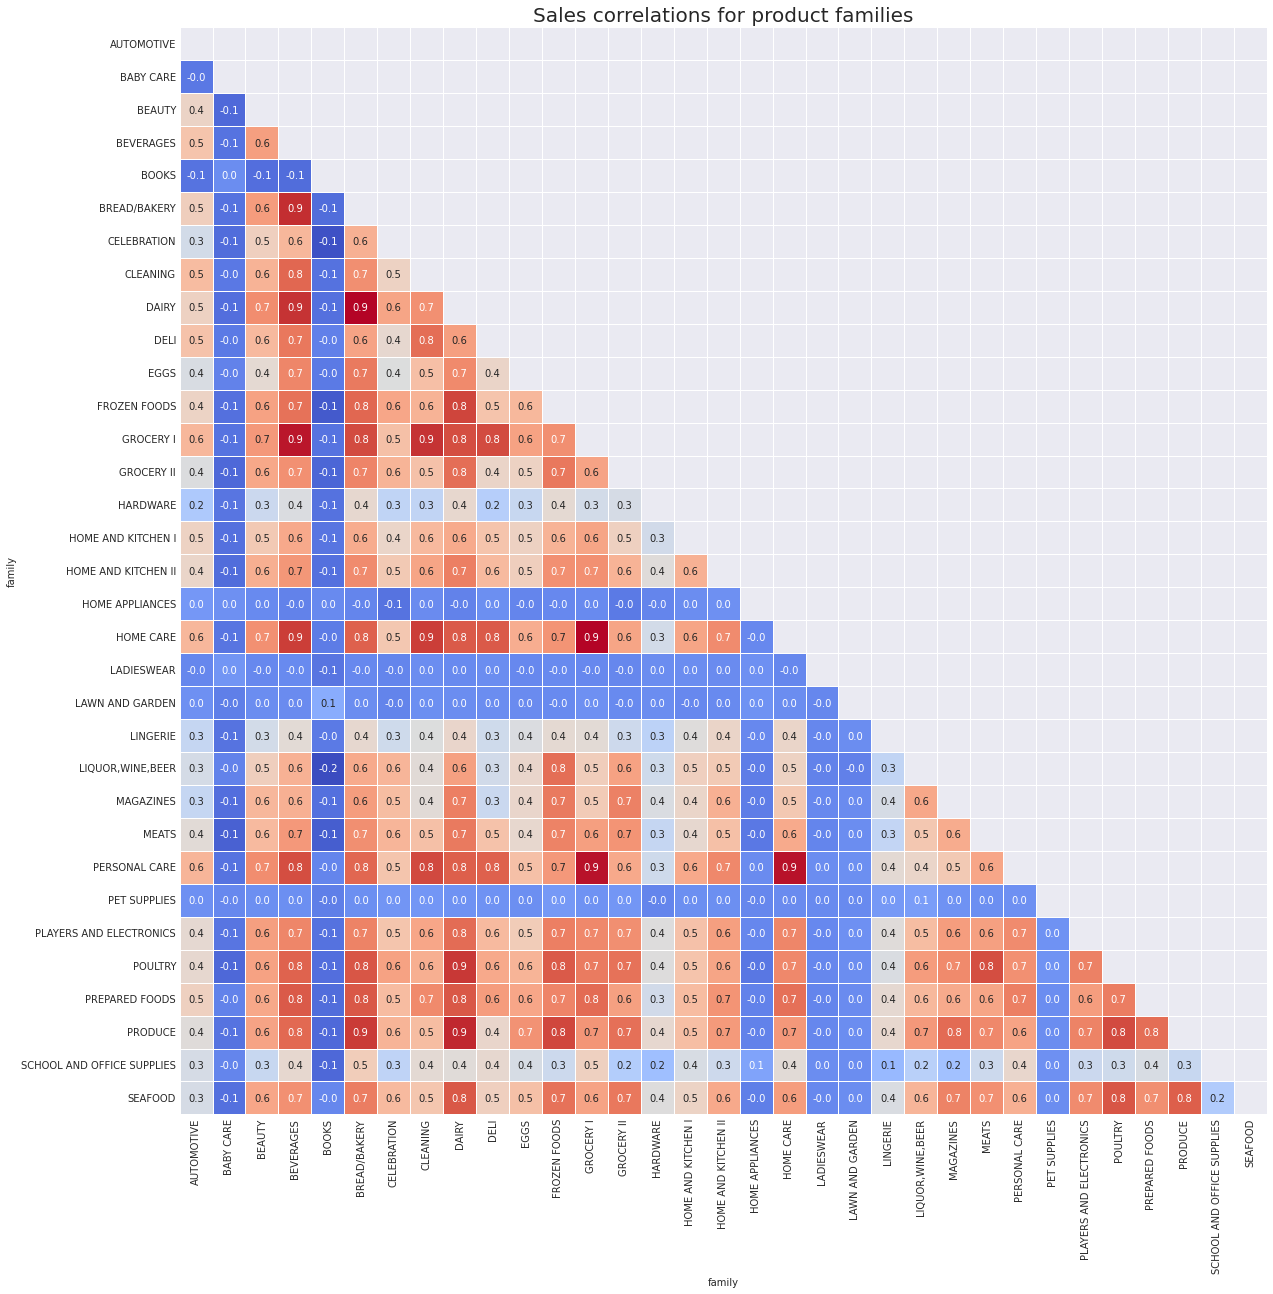

In [17]:
#from 2017-04-30 for faster calculation
a = train["2017-04-30":].reset_index()
a["ind"] = 1
a["ind"] = a.groupby("family").ind.cumsum().values
a = pd.pivot(a, index = "ind", columns = "family", values = "sales").corr(method="spearman")
mask = np.triu(a.corr(method="spearman"))
plt.figure(figsize=(20, 20))
sns.heatmap(a,
        annot=True,
        fmt='.1f',
        cmap='coolwarm',
        square=True,
        mask=mask,
        linewidths=1,
        cbar=False)
plt.title("Sales correlations for product families",fontsize = 20)
plt.show()

**BABY CARE, BOOKS, HOME APPLIANCES, LADIESWEAR, LAWN AND GARDEN, PET SUPPLIES** are not correlated with other products sales at all.  
**SCHOOL AND OFFICE SUPPLIES, LINGERIE** has a very low correlation.
But the rest of the product families' sales are all correlated, so **we clearly have a multivariate time series task.**  

> **Note:** We can use sales forecast of other products families in the SAME store **as A FEATURE** to improve prediction accuracy of specific product, as there's an influence on sales numbers between products. This is what we'll do later.  

Now let's check trends, seasonality and anomalies for these low correlated product families:

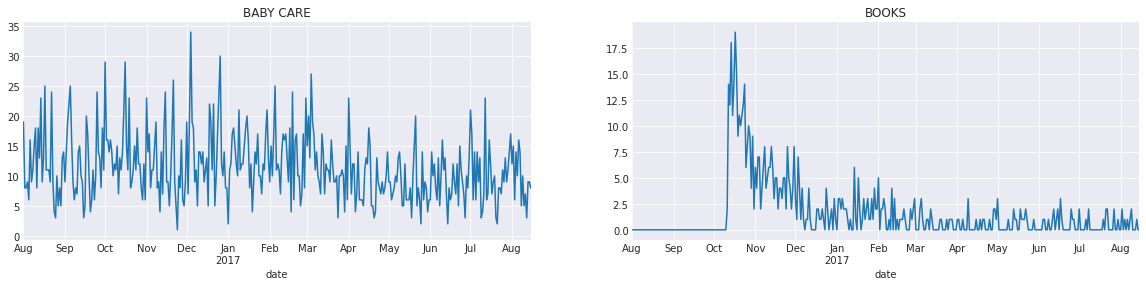

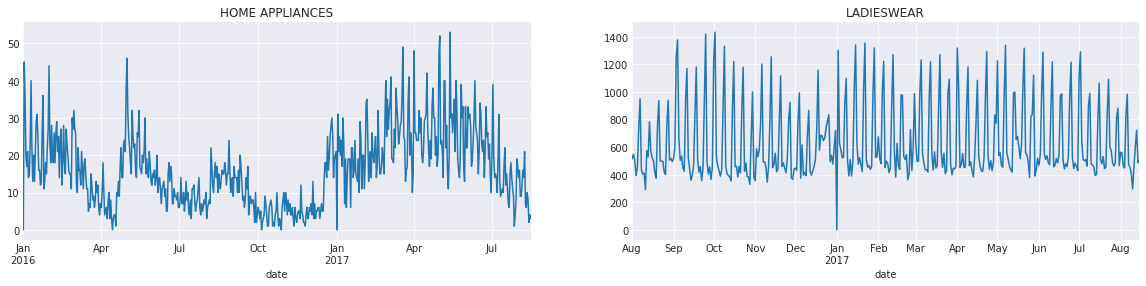

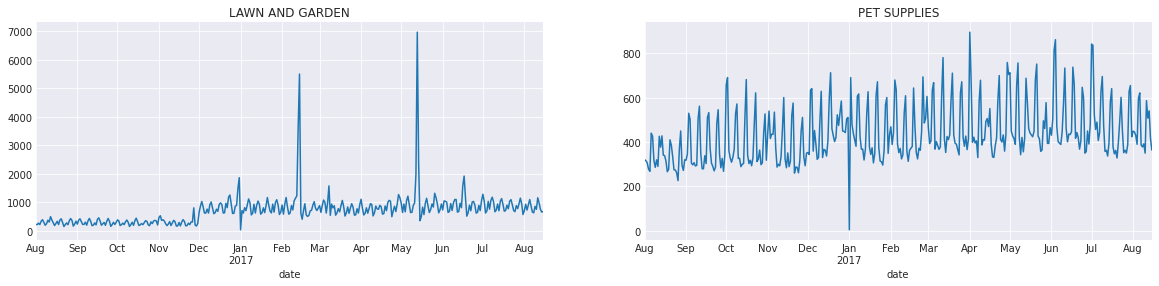

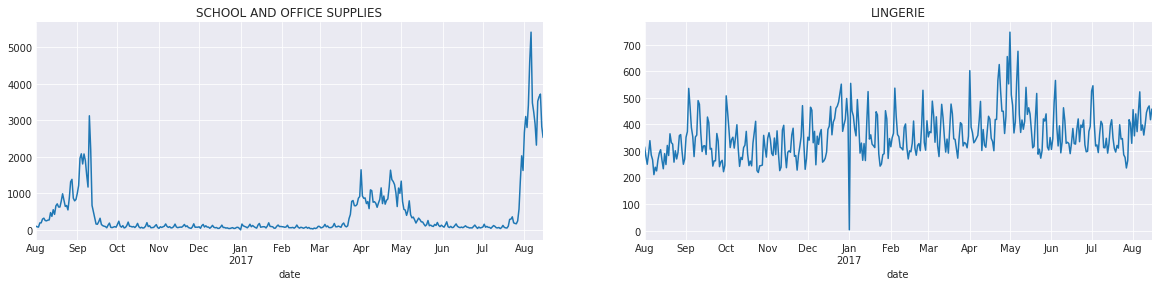

In [18]:
fig, ax = plt.subplots(1,2,figsize = (20,4))
train.loc["2016-08-01":].filter(like = 'BABY CARE', axis=0).groupby(["date"]).sales.sum().plot(ax = ax[0], title = "BABY CARE")
train.loc["2016-08-01":].filter(like = 'BOOKS', axis=0).groupby(["date"]).sales.sum().plot(ax = ax[1], title = "BOOKS")
plt.show()
fig, ax = plt.subplots(1,2,figsize = (20,4))
train.loc["2016-01-01":].filter(like = 'HOME APPLIANCES', axis=0).groupby(["date"]).sales.sum().plot(ax = ax[0], title = "HOME APPLIANCES")
train.loc["2016-08-01":].filter(like = 'LADIESWEAR', axis=0).groupby(["date"]).sales.sum().plot(ax = ax[1], title = "LADIESWEAR")
plt.show()
fig, ax = plt.subplots(1,2,figsize = (20,4))
train.loc["2016-08-01":].filter(like = 'LAWN AND GARDEN', axis=0).groupby(["date"]).sales.sum().plot(ax = ax[0], title = "LAWN AND GARDEN")
train.loc["2016-08-01":].filter(like = 'PET SUPPLIES', axis=0).groupby(["date"]).sales.sum().plot(ax = ax[1], title = "PET SUPPLIES")
plt.show()
fig, ax = plt.subplots(1,2,figsize = (20,4))
train.loc["2016-08-01":].filter(like = 'SCHOOL AND OFFICE SUPPLIES', axis=0).groupby(["date"]).sales.sum().plot(ax = ax[0], title = "SCHOOL AND OFFICE SUPPLIES")
train.loc["2016-08-01":].filter(like = 'LINGERIE', axis=0).groupby(["date"]).sales.sum().plot(ax = ax[1], title = "LINGERIE")
plt.show()

**What we see here:**
* 1st of January has zero sales - ie stores are closed on 1st of Jan. Make sense to start train period after 2017.01.01, just to avoid extra feature engineering on closing dates
* SCHOOL AND OFFICE SUPPLIES - looks like a [non-stationary TS](https://towardsdatascience.com/stationarity-in-time-series-analysis-90c94f27322), let's check that using Augmented Dickey-Fuller test further. Looks like this **y** will be difficult to predict by linear models, tree based models might be a better fit;
* BOOKS -  this product category might be some kind of an assortiment trial and on clearance since the begining of 2017. Sharp sales decline might be result of assortiment decline, which for books lead to near zero daily sales. Same - tree based models might have a better prediction results;
* LAWN AND GARDEN - there is an uplift in sales numbers from Dec'2016, most probably from introduction of this product category in more stores around the country. Feel free to check that ;-). But in overall - no specific ideas in terms of model type selection - ie linear models should be ok, as soon as you'll start train period **at least from 2017-01-02**;
* HOME APPLIANCES - looks like a non-stationary TS, let's check that using Augmented Dickey-Fuller test further. Tree based models might be a better fit for this product family;
* PET SUPPLIES - some monotonic trend component in TS, non-stationary TS;
* LINGERIE - same, some monotonic trend component in TS, non-stationary TS;

Let's check our time series for Stationarity using [Augmented Dickey-Fuller test](https://en.wikipedia.org/wiki/Augmented_Dickey–Fuller_test) with a significance level of less than 5%.  
The intuition behind this test is that it determines how strongly a time series is defined by a trend.  
As an example, let's take PET SUPPLIES, feel free to do the same for the rest of the "suspicious" product families:

In [19]:
result = adfuller(
    np.log1p(
        y.loc["2016-08-01":, y.columns.get_level_values("family").isin(["PET SUPPLIES"])].mean(axis="columns")
    )
)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["1%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -1.753177
p-value: 0.403943
Critical Values:
	1%: -3.495
	5%: -2.890
	10%: -2.582
Failed to Reject Ho - Time Series is Non-Stationary


Ok, now we want to test **tree based regressors (not linear)** for non-satitionary TS with a low multivariate correlation.  
I did it already and found out, that only "SCHOOL AND OFFICE SUPPLIES", "BOOKS" families will have an improvement from Tree based regressors vs. baseline Ridge.  
For these product families I'll use **GradientBoostingRegressor + ExtraTreesRegressor ensemble model**:

In [20]:
non_st_ts = ["SCHOOL AND OFFICE SUPPLIES","BOOKS"]

In [21]:
a = train.groupby("family").sales.mean().sort_values(ascending = False).reset_index()
px.bar(a, y = "family", x="sales", color = "family", title = "Top selling product families")

In FMCG high sales product categories usually have a low price elastisity and strong intra-week correlation.  
So, let's take TOP-40% most sold product families (personal guess, feel free to improve that 😉) and add **K-nearest neighbors regressor** (for strong intra-week/week seasonality) and **Bayesian regressor** into ensemble model for them.  
To simplify the things in CustomRegressor - I'll use inverse logic, with bottom 60% of low sales products in the separate list.

In [22]:
low_sales_ts = ["MAGAZINES","LAWN AND GARDEN","BABY CARE",
                "CELEBRATION","GROCERY II","HARDWARE","AUTOMOTIVE",
                "HOME AND KITCHEN I","HOME AND KITCHEN II",
                "HOME APPLIANCES","LINGERIE",
                "LADIESWEAR","SEAFOOD","PLAYERS AND ELECTRONICS",
                "PET SUPPLIES","BEAUTY","PREPARED FOODS",
                "HOME CARE","CLEANING"]

Let's take start date with some margin to stabilize sales numbers after opening - **2017-04-30**:

In [23]:
sdate = '2017-04-30'
x=x.loc[sdate:]
y=y.loc[sdate:]

## 3️⃣ Find relevant external features for several TS components in Multivariate Time Series
### Step 3.1 Select columns for external features search  

To find new features we'll use [Upgini Feature search and enrichment library for supervised machine learning applications](https://github.com/upgini/upgini#readme).

To initiate search with Upgini library, you need to define so called [*search keys*](https://github.com/upgini/upgini#-search-key-types-we-support-more-is-coming) - a set of columns to join external data sources and features. In this competition we can use the following keys:

1. Column **date** should be used as **SearchKey.DATE**.;  
2. **Country** as "EC" (ISO-3166 country code for Ecuador), as all the data came from Favorita retailer in Ecuador.
    
With this set of search keys, our dataset will be matched with [different time-specific features (such as weather data, calendar data, financial data, etc)](https://github.com/upgini/upgini#-connected-data-sources-and-coverage), taking into account the country where sales happened. Than relevant selection and ranking will be done.  
As a result, we'll add new, only relevant features with additional information about specific dates in Ecuador.  

We already have date as index in *train* and *test* datasets, so let's use it. Index name is `date`, so column will have the same name.   

To start the search, we need to initiate *scikit-learn* compartible `FeaturesEnricher` transformer with appropriate **search** parameters and cross-validation type (here we use [TimeSeries](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html) CV, because our target variable strongly depends on time, ie we have TS prediction task).  
After that, we can call the **fit** or **fit_transform**  method of `features_enricher` to start the search.

[⬇️ Step 4](#4️⃣-Train-final-model)


In [24]:
from upgini import FeaturesEnricher, SearchKey, ModelTaskType
from upgini.metadata import CVType

enricher = FeaturesEnricher(
    # search keys for feature enrichment - date and country
    search_keys={
        "date": SearchKey.DATE
    },
    country_code = "EC",
    # time series prediction tasks for relevant external feature selection
    cv = CVType.time_series,
)

### Step 3.2 Re-use existing training dataset and generate Univariate TS from Multivariate TS
For `FeaturesEnricher.fit_transform()` method, just like in all scikit-learn transformers, we should pass **X_train** as the first argument and **y_train** as the second argument.   
**y_train** is needed to select **only relevant features & datasets, which will improve accuracy**. And rank new external features according to their prediction contribution.  
Multioutput is not supported yet in `FeaturesEnricher` transformer  (supported dimension of y = 1), but that's what we have in this competition - each combination of FAMILY x STORE is a *SEPARATE* time series/y. And we have 1658 different **y** (considering Zero forecast). 

Workaround is very simpe - let's search for the new features to predict **mean number of daily sales in all stores for ONE product family**. And then enrich all **X_train** and **y** for THIS product family in Multivariate TS. As the same product category should be influenced by the same new features, no matter what store we predict.

As example, let's try to find features relevant for LIQUOR,WINE,BEER and CLEANING families, one by one - this types of FMCG goods usually have a strong correlation with holidays and work week calendar. And Upgini has a lot of datascources and features with types of holiday, distance to holidays, holidays influence scores on specific commercial activities, etc. for 232 countries with 22 years of history.  


That's just a quick guess, feel free to test other product families by fork & change of this kernel 😉

In [25]:
enriched_ts_map = {}
y_fe_1 = y.loc[:, y.columns.get_level_values("family").isin(["LIQUOR,WINE,BEER"])].mean(axis="columns")
y_fe_2 = y.loc[:, y.columns.get_level_values("family").isin(["CLEANING"])].mean(axis="columns")

# log transform to reshape y distribution closer to normal, as we'll use same approach in the final model
y_fe_1 = np.log1p(y_fe_1)
y_fe_2 = np.log1p(y_fe_2)

### Step 3.3 Initiate feature search and enrichment  
`FeaturesEnricher.fit_transform()` has a flag `calculate_metrics` for the quick estimation of quality improvement from the new external features on cross-validation and eval sets. This step is quite similar to [sklearn.model_selection.cross_val_score](https://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics), so you can pass exact metric with `scoring` parameter:

1. Built-in scoring [functions](https://github.com/upgini/upgini/blob/main/README.md#-accuracy-and-uplift-metrics-calculations);
2. Custom scorer.    
 
Notice that you should pass **X_train** as the first argument and **y_train** as the second argument for `FeaturesEnricher.fit_transform()`, just like in scikit-learn.  

*Step will take around 2 minutes*

In [26]:
%%time
from upgini import FeaturesEnricher, SearchKey, ModelTaskType
from upgini.metadata import RuntimeParameters, CVType

# LIQUOR,WINE,BEER
X_enriched = enricher.fit_transform(
    x.copy().reset_index(), 
    y_fe_1.reset_index(drop=True).values,
    calculate_metrics=True,
    keep_input=True, #optional, save all initial columns from input data frame,
    max_features=2,  #optional, enrich X ONLY with TOP2 new features based on SHAP value
).set_index("date")

Detected task type: ModelTaskType.REGRESSION


Column name,Status,Description
date,All valid,All values in this column are good to go
country_iso_code,All valid,All values in this column are good to go
target,All valid,All values in this column are good to go


Running search request with search_id=fad941a1-2333-489a-8b53-e3b582ebdd19
We'll send email notification once it's completed, just use your personal api_key from profile.upgini.com
Done


We found 3 relevant feature(s) for you by search keys: ['date', 'country_iso_code']


,feature_name,shap_value,coverage %,type
0,f_days_to_holiday_5ce1a653,0.269699,100.0,NUMERIC
1,f_holiday_code_3d_ahead_d4998487,0.253164,100.0,NUMERIC
2,f_week_cos1_d3d56d7f,0.098024,100.0,NUMERIC
3,wd,0.055214,100.0,NUMERIC
4,trend,0.000000,NaN,NaN
5,"sin(1,freq=W-SUN)",0.000000,NaN,NaN
6,"cos(1,freq=W-SUN)",0.000000,NaN,NaN
7,"sin(2,freq=W-SUN)",0.000000,NaN,NaN
8,"cos(2,freq=W-SUN)",0.000000,NaN,NaN
9,"sin(3,freq=W-SUN)",0.000000,NaN,NaN


Start calculating metrics
Done

Quality metrics


,match_rate,baseline mean_squared_error,enriched mean_squared_error,uplift
,,,,
train,100.0,0.04856,0.032027,0.016532


CPU times: user 5.04 s, sys: 905 ms, total: 5.94 s
Wall time: 1min 23s


We've got **3 new relevant external features**, which might improve accuracy of the model ranked by [SHAP values](https://en.wikipedia.org/wiki/Shapley_value).   

Initial features from search dataset will be checked for relevancy as well, so you don't need an extra feature selection step.

MSE uplift after enrichment using all of the new external features is *positive* and *significant* - more than +30%.  
We enriched initial feature space with only **TOP-2** most important features, according to the SHAP values (parameter `max_features=2`).

>Generally it's a bad idea to put a lot of features with unknown structure (and possibly high pairwise correlation) into a linear model, even with regularization like Ridge or Lasso, without careful selection and pre-processing.

Let's add these **TOP-2** features to external features map (enriched_ts_map) with key LIQUOR,WINE,BEER:

In [27]:
enriched_ts_map["LIQUOR,WINE,BEER"] = list(set(X_enriched.columns) - set(x.columns))

Next step is to enrich test dataset with the **TOP-2** new features as well. And that's all for enrichment step.  

*Step will take around 2 minutes*

In [28]:
X_test_enriched = enricher.transform(
    xtest.copy().reset_index(),
    keep_input=True,
    max_features=2, 
).set_index("date")

Column name,Status,Description
date,All valid,All values in this column are good to go
country_iso_code,All valid,All values in this column are good to go


Running search request with search_id=aba7d754-2f34-4acc-b22b-ee6a5669a813
We'll send email notification once it's completed, just use your personal api_key from profile.upgini.com
Done

Executing transform step
Done


Now, the same `fit_transform` step for CLEANING product family. Using enrichment pipelining for already enriched `X_enriched` and `X_test_enriched`.

In [29]:
# CLEANING
X_enriched2 = enricher.fit_transform(
    X_enriched.reset_index(), 
    y_fe_2.reset_index(drop=True).values,
    calculate_metrics=True,
    keep_input=True, 
    max_features=2,
).set_index("date")

X_test_enriched2 = enricher.transform(
    X_test_enriched.reset_index(),
    keep_input=True,
    max_features=2, 
).set_index("date")

Detected task type: ModelTaskType.REGRESSION


Column name,Status,Description
date,All valid,All values in this column are good to go
country_iso_code,All valid,All values in this column are good to go
target,All valid,All values in this column are good to go


Running search request with search_id=f64a27c8-8494-4807-92f5-b697b95c8b44
We'll send email notification once it's completed, just use your personal api_key from profile.upgini.com
Done


We found 3 relevant feature(s) for you by search keys: ['date', 'country_iso_code']


,feature_name,shap_value,coverage %,type
0,wd,0.403023,100.0,NUMERIC
1,f_days_from_holiday_fbad7b66,0.104953,100.0,NUMERIC
2,f_month_cos1_c2b0dad4,0.061024,100.0,NUMERIC
3,f_weather_pca_7_36c4ac3f,0.045018,100.0,NUMERIC
4,trend,0.000000,NaN,NaN
5,"sin(1,freq=W-SUN)",0.000000,NaN,NaN
6,"cos(1,freq=W-SUN)",0.000000,NaN,NaN
7,"sin(2,freq=W-SUN)",0.000000,NaN,NaN
8,"cos(2,freq=W-SUN)",0.000000,NaN,NaN
9,"sin(3,freq=W-SUN)",0.000000,NaN,NaN


Start calculating metrics
Done

Quality metrics


,match_rate,baseline mean_squared_error,enriched mean_squared_error,uplift
,,,,
train,100.0,0.045513,0.03943,0.006083


Column name,Status,Description
date,All valid,All values in this column are good to go
country_iso_code,All valid,All values in this column are good to go


Running search request with search_id=8c7a738b-ac8e-4afa-880f-2fc2dbd561fb
We'll send email notification once it's completed, just use your personal api_key from profile.upgini.com
Done

Executing transform step
Done


Again, let's add most important features to external features map with key CLEANING:

In [30]:
enriched_ts_map["CLEANING"] = list(set(X_enriched2.columns) - set(X_enriched.columns))

### Summary on external feature search & enrichment

In [31]:
print("Number of features, initial -> after enrichment:",x.shape[1],"->",X_enriched2.shape[1])
int_features = set(x.columns.to_list())
ext_features = [col for ext_features_ in enriched_ts_map.values() for col in ext_features_]

x = X_enriched2
xtest = X_test_enriched2
del X_enriched, X_enriched2
del X_test_enriched, X_test_enriched2
del y_fe_1
del y_fe_2
_ = gc.collect()

Number of features, initial -> after enrichment: 26 -> 30


## 4️⃣ Train final model
### 4.1 Same store sales predictions as new features ("not-so-blending")

Once again - it's a very well known fact, that for the FMCG goods there is a strong correlation between product categories - when buying product X, consumer buys product Y as well.  
And we already check what product families are correlated and what is not. Most of the product famlilies are correlated (25 of 33).
So let's try to use sales PREDICTION by product family as a new features, to catch information on joint sales
> **Note on original notebook approach**: This approach was called "blending" in the original notebook. But there was no holdout set to avoid overfitting  and blending linear model are being trained on the same data as the ensembling (final) model. I strongly recommend you to read about blending with great visualisation [here](https://towardsdatascience.com/ensemble-learning-stacking-blending-voting-b37737c4f483). In addition to that, in a final Custom Regressor there was no filter "same store sales predictions" and sales from ALL stores was used as features for every single store, so I fixed that.

[⬇️ Step 5](#5️⃣-Submit-prediction-with-enriched-features-and-calculate-final-leaderbord-progress)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor, ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import make_pipeline

lnr_reg = TransformedTargetRegressor(
    regressor = LinearRegression(fit_intercept = True, n_jobs = -1),
    func=np.log1p,
    inverse_func=np.expm1
)
lnr = make_pipeline(
    ColumnTransformer([("drop_f", "drop", ext_features)], remainder="passthrough"),
    PowerTransformer(),
    lnr_reg
)

lnr.fit(x, y)
yfit_lnr = pd.DataFrame(lnr.predict(x), index = x.index, columns = y.columns).clip(0.)
ypred_lnr = pd.DataFrame(lnr.predict(xtest), index = xtest.index, columns = y.columns).clip(0.)

y_ = y.stack(['store_nbr', 'family'])
y_['lnr'] = yfit_lnr.stack(['store_nbr', 'family'])['sales']

Now add this linear regression's prediction to existing train and test data:

In [33]:
#from 30.04.17 till 31.08.17
ylnr = yfit_lnr.append(ypred_lnr)
x = x.join(ylnr)
xtest = xtest.join(ylnr)
del yfit_lnr
del ypred_lnr
del ylnr
_ = gc.collect()

### 4.2 Final model - Custom Regressor

What `CustomRegressor` is doing here - it's fiting individual model on EVERY component of Multivariate TS - single TS as combination FAMILY x STORE. And there will be 1658 independent models (excluding Zero forecast).  
In our analysis on cross product correlations, we decided to introduce 3 groups of models in `CustomRegressor`, customized for specific product family set:
* Selected non stationary time-series with low correlations: **GradientBoostingRegressor + ExtraTreesRegressor voting ensemble model**
* High sales product categories (TOP 40% by sales): **K-nearest neighbors regressor + Bayesian regressor + Ridge + SVR voting ensemble model**
* Product families enriched with new external features: simpe **Ridge regressor**
* Low sales product categories (BOTTOM 60% by sales): **Ridge regressor + SVR voting ensemble**

In [34]:
import warnings
from sklearn.linear_model import Ridge, ARDRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor, VotingRegressor
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import make_pipeline

# SEED for reproducible result
SEED = 5

class CustomRegressor():
    
    def __init__(self, ext_features = None, knn_features = None, non_st_ts = None, low_sales_ts = None, enriched_ts_map = None, n_jobs=-1):
        
        self.n_jobs = n_jobs
        self.ext_features = ext_features
        self.knn_features = knn_features
        self.non_st_ts = non_st_ts
        self.low_sales_ts = low_sales_ts
        self.enriched_ts_map = enriched_ts_map
        self.estimators_ = None
        self.product_names_ = None
        self.store_names_ = None
        
    def _estimator_(self, X, y):
        warnings.simplefilter(action='ignore', category=FutureWarning)
        
        # We remove external features for the products, which univariate TS were note used during feature search & enrichment
        # As these features won't be relevant for the rest of product families and might decrease accuracy
        remove_ext_features = ColumnTransformer([("drop_f", "drop", self.ext_features)],remainder="passthrough")
        
        if y.name[2] in self.non_st_ts:
            b1 = GradientBoostingRegressor(n_estimators = 175, max_depth=3, loss='huber', random_state=SEED)
            r1 = ExtraTreesRegressor(n_estimators = 250, n_jobs=self.n_jobs, random_state=SEED)
            b2 = BaggingRegressor(base_estimator=r1,
                                  n_estimators=10,
                                  n_jobs=self.n_jobs,
                                  random_state=SEED)
            model = make_pipeline(
                remove_ext_features,
                VotingRegressor ([('gbr', b1), ('et', b2)])
            )      
        elif y.name[2] in self.enriched_ts_map.keys():
            ## use only external features selected for this particular TS
            ext_features_ = [col for col in self.ext_features if col not in self.enriched_ts_map[y.name[2]]]
            remove_ext_features_ = ColumnTransformer([("drop_f", "drop", ext_features_)],remainder="passthrough")
            
            # Yeo-Johnson transform for X to reshape X distribution closer to normal (Gaussian) for linear model
            power_tr = PowerTransformer()
            
            # Log(y) + 1 transform to reshape y distribution closer to normal for linear model,
            # then round transform - as  LIQUOR,WINE,BEER and CLEANING sales must be integer
            ridge = TransformedTargetRegressor(
                regressor = Ridge(fit_intercept=True, solver='auto', alpha=0.7, normalize=True, random_state=SEED),
                func=np.log1p,
                inverse_func=np.expm1
            )
            ridge_round_to_int = TransformedTargetRegressor(
                regressor=ridge,
                inverse_func=np.rint
            )
            model = make_pipeline(
                remove_ext_features_,
                power_tr,
                ridge_round_to_int
            )
            
        elif y.name[2] in self.low_sales_ts:
            ridge = TransformedTargetRegressor(
                regressor = Ridge(fit_intercept=True, solver='auto', alpha=0.75, normalize=True, random_state=SEED),
                func=np.log1p,
                inverse_func=np.expm1
            )
            svr = TransformedTargetRegressor(
                regressor = SVR(C = 0.2, kernel = 'rbf'),
                func=np.log1p,
                inverse_func=np.expm1
            )
            model = VotingRegressor([('ridge', ridge), ('svr', svr)])
        else:
            ridge = make_pipeline(
                remove_ext_features,
                TransformedTargetRegressor(
                    regressor = Ridge(fit_intercept=True, solver='auto', alpha=0.6, normalize=True, random_state=SEED),
                    func=np.log1p,
                    inverse_func=np.expm1)
            )
            svr = make_pipeline(
                remove_ext_features,
                TransformedTargetRegressor(
                    regressor = SVR(C = 0.2, kernel = 'rbf'),
                    func=np.log1p,
                    inverse_func=np.expm1)
            )
            # We'll use specific feature set for KNN to cluster observations in a way to catch week and intra-week seasonality
            knn = make_pipeline(
                ColumnTransformer([("selector", "passthrough", self.knn_features)], remainder="drop"),
                PowerTransformer(),
                KNeighborsRegressor(n_neighbors=3, n_jobs=self.n_jobs)
            )
            ard = make_pipeline(
                remove_ext_features,
                TransformedTargetRegressor(
                    regressor = ARDRegression(fit_intercept=True, normalize=True, n_iter=300),
                    func=np.log1p,
                    inverse_func=np.expm1)
            )
            estimators = [
                ('ridge', ridge),
                ('svr', svr),
                ("ard", ard),
                ("knn",knn)
            ]
            model = VotingRegressor(estimators)
            
        model.fit(X, y)
        return model
    
    def fit(self, X, y):
        print("Fit stage...")
        self.product_names_ = [str(y.iloc[:, i].name[2]) for i in range(y.shape[1])]
        self.store_names_ = [str(y.iloc[:, i].name[1]) for i in range(y.shape[1])]
        self.estimators_ = []
        for i, n in tqdm(enumerate(self.product_names_)):
            estimator_ = self._estimator_(
                # select as features only predictions of product sales in the same store or same product in other stores
                X.filter(
                    regex= n + "'\)$|\(\d|^[a-zA-Z_0-9., ]+$|\('sales', '" + str(y.iloc[:, i].name[1]) + "',",
                    axis=1,
                ),
                y.iloc[:, i],
            )
            self.estimators_.append(estimator_)
        
    def predict(self, X):
        print("Prediction stage...")
        y_pred = []
        for e, n, m in tqdm(zip(self.estimators_, self.product_names_, self.store_names_)):
            y_pred_ = e.predict(
                # select as features only predictions of product sales in the same store or same product in other stores
                X.filter(
                    regex= n + "'\)$|\(\d|^[a-zA-Z_0-9., ]+$|\('sales', '" + m + "',",
                    axis=1,
                )
            )
            y_pred.append(y_pred_)
            
        return np.stack(y_pred, axis=1)

Be patient - training may take up to 15 minutes:

In [35]:
%%time 

# manual selection for KNN regression
knn_features = list(int_features - set(['oil_lags2', 'oil_lags1',"trend"]))
model = CustomRegressor(ext_features, knn_features, non_st_ts, low_sales_ts, enriched_ts_map, n_jobs=-1)
model.fit(x, y)

y_pred = pd.DataFrame(model.predict(x), index=x.index, columns=y.columns)

Fit stage...


1658it [11:17,  2.45it/s]


Prediction stage...


1658it [03:07,  8.83it/s]

CPU times: user 18min 39s, sys: 19min 36s, total: 38min 16s
Wall time: 14min 25s


## 5️⃣ Submit prediction with enriched features and calculate final leaderbord progress
Let's quickly estimate model accuracy (no cross validation!) and submit:

In [36]:
from sklearn.metrics import mean_squared_log_error as msle
y_pred = y_pred.stack(['store_nbr', 'family']).clip(0.)
y_ = y.stack(['store_nbr', 'family']).clip(0.)
y_['pred'] = y_pred.values
print(y_.groupby('family').apply(lambda r : np.sqrt(np.sqrt(msle(r['sales'], r['pred'])))))
print('RMSLE : ', np.sqrt(np.sqrt(msle(y_['sales'], y_['pred']))))

family
AUTOMOTIVE                    0.683478
BABY CARE                     0.594298
BEAUTY                        0.684615
BEVERAGES                     0.389473
BOOKS                         0.265664
BREAD/BAKERY                  0.355627
CELEBRATION                   0.706161
CLEANING                      0.487667
DAIRY                         0.338115
DELI                          0.379857
EGGS                          0.495445
FROZEN FOODS                  0.477412
GROCERY I                     0.369234
GROCERY II                    0.709905
HARDWARE                      0.694118
HOME AND KITCHEN I            0.659819
HOME AND KITCHEN II           0.624364
HOME APPLIANCES               0.610248
HOME CARE                     0.429842
LADIESWEAR                    0.696618
LAWN AND GARDEN               0.689495
LINGERIE                      0.751659
LIQUOR,WINE,BEER              0.638207
MAGAZINES                     0.673559
MEATS                         0.397789
PERSONAL CARE     

In [37]:
%%time 

ypred = pd.DataFrame(model.predict(xtest), index = xtest.index, columns = y.columns).clip(0.)
ypred = ypred.stack(['store_nbr', 'family'])
ypred = ypred.append(zero_prediction).sort_index()
sub = pd.read_csv('../input/store-sales-time-series-forecasting/sample_submission.csv')
sub['sales'] = ypred.values
sub.to_csv('submission.csv', index = False)

Prediction stage...


1658it [02:45,  9.99it/s]


CPU times: user 1min 32s, sys: 3.46 s, total: 1min 36s
Wall time: 2min 46s


This submission has score **0.39261** on LB and **2nd place** by the time of publication (2022/06/06).  
Just a reminder - baseline solution had **0.40419**

#### ⚡️ We've got a significant improvement AND still we not used ALL competition datasets:
* promotion information on product family from train and test datasets  
* store dataset - location, category, cluster for the stores 

#### Go ahead and improve this solution further! 📈🎉

## 🌎 Relevant external features & data sources
Here is the description of relevant features from Upgini enrichment:

* **f_days_to_holiday_5ce1a653** - number of days to the nearest holiday in Ecuador (any type - national or local), which is a non working day. Transfers will be taken into account.

* **f_days_from_holiday_fbad7b66** -  number of days from the nearest holiday in Ecuador (any type - national or local), which is a non working day. Transfers will be taken into account.

* **f_holiday_code_3d_ahead_d4998487** - weighted sum of holidays in Ecuador in a 3-day window from today to the day after tomorrow, where national holidays have a weight of 2 and local holidays have a weight of 1.

* **f_month_cos1_c2b0dad4** - 1st order component to take into account the intra-month seasonality, calculated according to the formula $month\_cos1 = \cos(\frac{2 \pi \cdot order \cdot day\_of\_month}{days\_in\_month})$.

#### 🚀 Happy kaggling and external features search! 
<sup>😔 Found error in the library or a bug in notebook code? Our bad! <a href="https://github.com/upgini/upgini/issues/new?assignees=&title=readme%2Fbug">
Please report it here.</a></sup>